## using multiple regression
for the same car price dataset, running multiple regression

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv("./datasets/CarPrice_Assignment.csv")
df.drop(columns=["car_ID", "CarName", "symboling"], index=1, inplace=True)
print(df.head())

  fueltype aspiration doornumber      carbody drivewheel enginelocation  \
0      gas        std        two  convertible        rwd          front   
2      gas        std        two    hatchback        rwd          front   
3      gas        std       four        sedan        fwd          front   
4      gas        std       four        sedan        4wd          front   
5      gas        std        two        sedan        fwd          front   

   wheelbase  carlength  carwidth  carheight  ...  enginesize fuelsystem  \
0       88.6      168.8      64.1       48.8  ...         130       mpfi   
2       94.5      171.2      65.5       52.4  ...         152       mpfi   
3       99.8      176.6      66.2       54.3  ...         109       mpfi   
4       99.4      176.6      66.4       54.3  ...         136       mpfi   
5       99.8      177.3      66.3       53.1  ...         136       mpfi   

  boreratio  stroke compressionratio  horsepower  peakrpm  citympg  \
0      3.47    2.68   

In [30]:
## using only numeric data types
df_cont = df.select_dtypes(include="number")
print(df_cont.head())

   wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0       88.6      168.8      64.1       48.8        2548         130   
2       94.5      171.2      65.5       52.4        2823         152   
3       99.8      176.6      66.2       54.3        2337         109   
4       99.4      176.6      66.4       54.3        2824         136   
5       99.8      177.3      66.3       53.1        2507         136   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   
5       3.19    3.40               8.5         110     5500       19   

   highwaympg    price  
0          27  13495.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  
5        

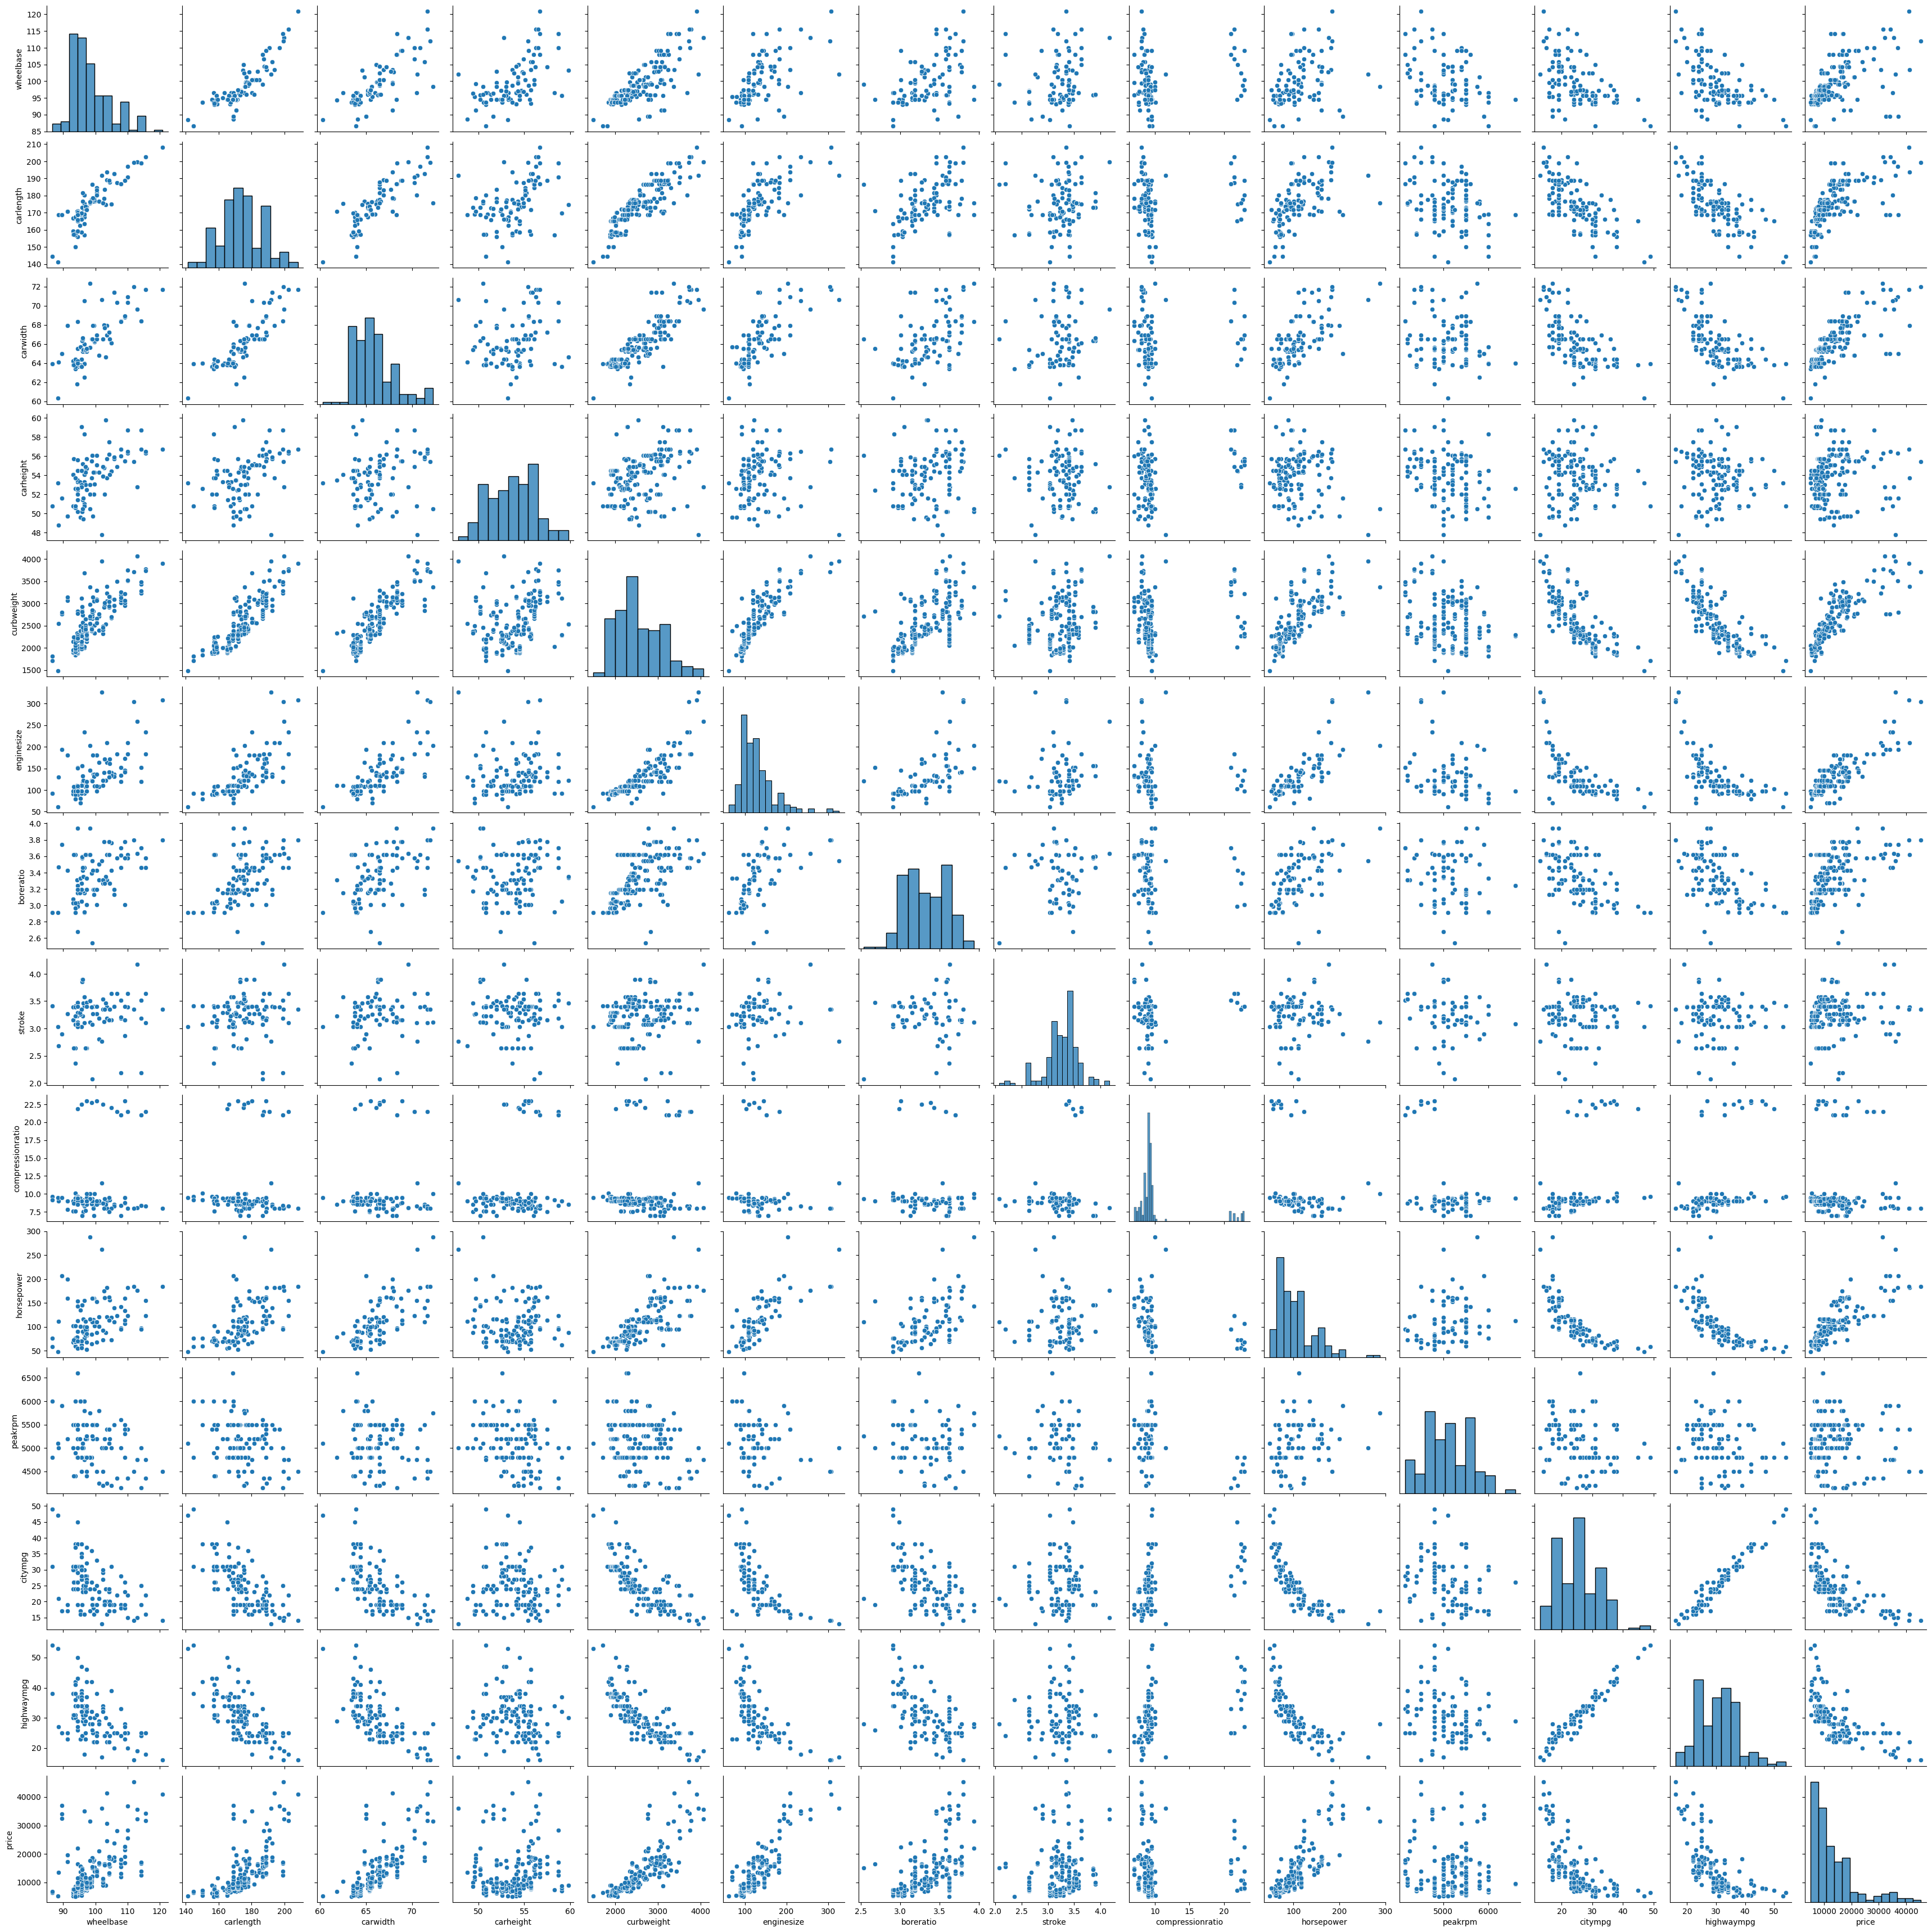

In [31]:
sns.pairplot(df_cont)

In [32]:
X = df_cont.iloc[:,:-1]
y = df_cont[["price"]]
print(X)

     wheelbase  carlength  carwidth  carheight  curbweight  enginesize  \
0         88.6      168.8      64.1       48.8        2548         130   
2         94.5      171.2      65.5       52.4        2823         152   
3         99.8      176.6      66.2       54.3        2337         109   
4         99.4      176.6      66.4       54.3        2824         136   
5         99.8      177.3      66.3       53.1        2507         136   
..         ...        ...       ...        ...         ...         ...   
200      109.1      188.8      68.9       55.5        2952         141   
201      109.1      188.8      68.8       55.5        3049         141   
202      109.1      188.8      68.9       55.5        3012         173   
203      109.1      188.8      68.9       55.5        3217         145   
204      109.1      188.8      68.9       55.5        3062         141   

     boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0         3.47    2.68               

In [33]:
print(df_cont.corr())

                  wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase          1.000000   0.877612  0.795115   0.582603    0.781763   
carlength          0.877612   1.000000  0.841199   0.491969    0.878090   
carwidth           0.795115   0.841199  1.000000   0.274075    0.868493   
carheight          0.582603   0.491969  0.274075   1.000000    0.298429   
curbweight         0.781763   0.878090  0.868493   0.298429    1.000000   
enginesize         0.573989   0.683830  0.737042   0.068577    0.850611   
boreratio          0.496872   0.608212  0.562656   0.178119    0.648946   
stroke             0.147978   0.126799  0.177107  -0.074894    0.170075   
compressionratio   0.249199   0.157913  0.180287   0.261036    0.151372   
horsepower         0.357279   0.553276  0.642628  -0.108170    0.750808   
peakrpm           -0.365278  -0.287969 -0.221527  -0.326352   -0.266307   
citympg           -0.479633  -0.673251 -0.647177  -0.055659   -0.758238   
highwaympg        -0.5528

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1987)

In [36]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [37]:
regression = LinearRegression(fit_intercept=True, n_jobs = -1)
regression.fit(xtrain,ytrain)

LinearRegression(n_jobs=-1)

In [38]:
ypred = regression.predict(xtest)
mse = mean_squared_error(ytest,ypred)
mae = mean_absolute_error(ytest,ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)
print(f"Mean squared error: {mse}\nMean absolute error: {mae}\nR2: {r2}")
print(f"Regression coefficient: {regression.coef_}\nIntercept: {regression.intercept_}")

Mean squared error: 6519944.098554553
Mean absolute error: 2063.2382638479153
R2: 0.6923750066762547
Regression coefficient: [[  668.74278257 -1239.30308609  1187.18296257   642.8497303
   1198.59317865  5299.68875721  -293.35681283  -857.77901061
   1017.76863355  1308.33901354  1224.63832915 -1342.80496668
    785.16733028]]
Intercept: [13666.38752761]


In [40]:
#cross validation - 10-fold
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(regression, xtrain, ytrain, scoring="r2", cv = 10)
print(cv_score)

[0.69101673 0.72238806 0.86226037 0.78604352 0.85175706 0.86100143
 0.68653734 0.86794586 0.90187066 0.80644325]


In [41]:
ypred = regression.predict(xtest)

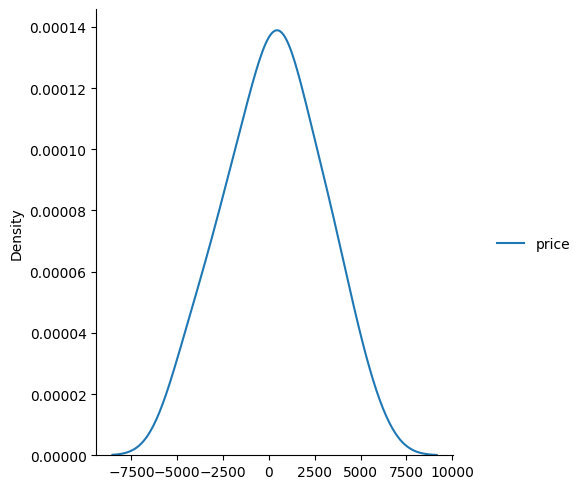

In [42]:
residual_vals = ypred-ytest
sns.displot(residual_vals, kind="kde")

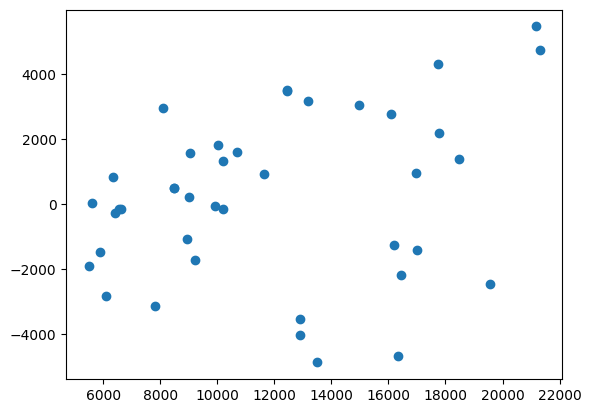

In [43]:
plt.scatter(ypred, residual_vals)